# Regresión lineal

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Las regresiones lineales son muy comunes y versátiles para distintos problemas, en este cuaderno veremos como hacerlas fácilemente en Python. El estudiante debe estar familiarizado con Mínimos cuadrados (tema de Algebra Lineal 1).

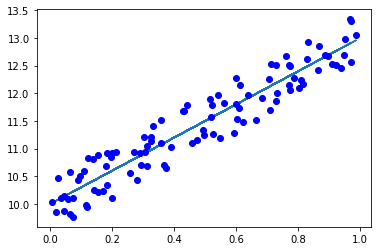

In [14]:
# Crear datos
np.random.seed(42)
x = np.random.random(100)
slope_0 = 3
intercept_0 = 10

y_clean = slope_0 * x + intercept_0 #Simple function

y_noise = y_clean + (np.random.random(100) -0.5 ) #Simple uniform noise
plt.plot(x, y_clean)
plt.plot(x, y_noise, 'ob')

Librerías dotadas de algoritmos para hacer regresiones lineales hay en abundancia, numpy, scipy y sklearn son solo algunos ejemplos. En este caso veremos scipy:


In [16]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y_noise)
print(f"Slope fit {slope}, Intercept fit {intercept}")
print(f"Slope real {slope_0}, Intercept real {intercept_0}")

Slope fit 2.966468356120381, Intercept fit 10.013597656401032
Slope real 3, Intercept real 10


Podemos ver que el método funciona bien. Este método en particular también nos brinda información extra como el valor $r$, $p$ y el error estándar en la estimación.

No obstante también podemos construir nuestra regresión lineal para entender mejor lo que sucede en estos casos. Volviendo al curso de álgebra lineal 1 podrán recordar el método de mínimos cuadrados o Least-squares que consiste en minimizar un costo (o loss) de la forma
$$L = \sum_n^N \frac{(f(x_n) - y_n)^2}{2N}$$
Donde tenemon $N$ diferentes puntos indexados por $n$. Esto es equivalente a escribir
$$L = \frac{1}{2N}\vec{e}\cdot\vec{e}$$
donde las componentes de $\vec{e}$ son $e_n = y_n - f(x_n)$. 
Para ello utilizamos la ecuación normal:
$$\frac{\partial L}{\partial x} =0$$

Imagine que tenemos un modelo lineal $$f(x_n) = w_0 + w_1x_n = (w_0, w_1)\cdot(1, x_n)^T=x_{n,i}w_{i}$$
La matrix de componentes $x_{i,n}$ , $X$, se denomina matriz de diseño y tiene $N$ filas para $N$ puntos o muestras y tiene en este caso 2 columnas para las potencias de $x$ de nuestro modelo (0,1).
La ecuación normal es entonces
$$0=\frac{1}{N}X^T\vec{e} = \frac{1}{N}\sum_n e_nx_{n,i}$$
$$ X^T\vec{y} = X^TX\vec{w}$$
donde podemos reconocer la matriz de Gram. Si ésta es invertible podemos despejar los parámetros óptimos del modelo $\vec{w}$ pero en general es mejor utilizar algun método para solucionar ecuaciones lineales:

In [25]:
X = np.c_[np.ones_like(x), x]

w = np.linalg.solve(X.T.dot(X), X.T.dot(y_noise))
print(f"Slope fit {w[1]}, Intercept fit {w[0]}")
print(f"Slope real {slope_0}, Intercept real {intercept_0}")

Slope fit 2.9664683561203846, Intercept fit 10.013597656401032
Slope real 3, Intercept real 10


In [26]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/JsthE-hPQE0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/home/daniel/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
